# –í–∏–¥–µ–æ–≥—Ä—ã

## –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –∏ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
!python3 -m pip install vk_api
!python3 -m pip install pyaspeller
!python3 -m pip install pymorphy2
!pip install dostoevsky
!python -m dostoevsky download fasttext-social-network-model
!pip install pyLDAvis
!pip install networkx==1.11
!pip install matplotlib==2.2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import vk_api
import time
import requests
import pandas as pd
from pymorphy2 import MorphAnalyzer
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pyaspeller import YandexSpeller
import nltk
import re
import sys
from wordcloud import WordCloud
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
import gensim.corpora as corpora
from gensim.models import LdaMulticore, CoherenceModel
from tqdm import tqdm
from gensim.models import LdaMulticore, CoherenceModel
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
from collections import Counter
import networkx as nx
import warnings
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## –ü–∞—Ä—Å–∏–Ω–≥ –∏ —Å–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞ —Ñ—Ä–µ–π–º–∞

–ü–∞—Ä—Å–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ PyCharm, Colab –ø–æ—á–µ–º—É-—Ç–æ –Ω–µ –¥–∞—ë—Ç –æ—Ç–ø—Ä–∞–≤–ª—è—Ç—å –∑–∞–ø–æ—Ä–æ—Å —á–µ—Ä–µ–∑ —Ç–∞–∫–æ–π –∫–æ–¥ :\

In [ ]:
# def rq(off):
#     data_posts = []
#     vk_config = {"token": "20d20cca23e42227516f682015d848b02bfbd384d1137d20efa3a8d2c556819a41e36e090525dc000887f",
#                  "client_id": "8174809",
#                  "version": "5.131",
#                  "domain": "https://api.vk.com/method/"}

#     count = 100
#     owner_id = -353324

#     for i in range(off, off + 3000, 100):
#         req = requests.get(vk_config["domain"] + "wall.get", params={"access_token": vk_config["token"],
#                                                                     "v": vk_config["version"],
#                                                                      "account_id": vk_config["client_id"],
#                                                                      "owner_id": owner_id,
#                                                                      "count": count,
#                                                                      "offset": off})
#         data = req.json()["response"]["items"]
#         for item in data:
#             data_posts.append(item['text'])
#         time.sleep(0.5)
#     return data_posts

In [ ]:
df = pd.DataFrame(pd.read_csv("dataset.csv"))
df.rename(columns = {"Unnamed: 0": "index", "texts": "text"}, inplace = True)
df.text = df.text.astype('string')
df = df.set_index('index')
df.dropna(inplace = True)

## –ü—Ä–µ–¥–ø—Ä–æ—Ü–µ—Å—Å

–ü—Ä–µ–¥–ø—Ä–æ—Ü–µ—Å—Å –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Ç–∞–∫:
* –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
* —É–¥–∞–ª—è–µ–º —Å—Å—ã–ª–∫–∏
* —É–¥–∞–ª—è–µ–º —ç–º–æ–¥–∂–∏
* —É–¥–∞–ª–µ–Ω–∏–µ –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é
* –∏—Å–ø—Ä–∞–≤–ª—è–µ–º –æ—à–∏–±–∫–∏
* —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è 
* –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è
* —É–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
# —Ç—Ä–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—Ç—á–∏—Å—Ç–∫–∏ 
def clear_from_stopwords(message):
    message = message.split()
    myList = list()
    russian_stopwords = stopwords.words("russian")
    for i in range(0, len(message)):
        if message[i] not in russian_stopwords:
            myList.append(message[i])
    return myList


def clear_message(message):
    clean_text = message
    string_punctuation = string.punctuation + "‚Äî" + "¬´" + "¬ª" + "1" + "2" + "3" + "4" +"5" + "6" + "7" + "8" + "9" + "0"
    for ch in string_punctuation:
        clean_text = clean_text.replace(ch, "")
    return clean_text

def clear_links(message):
    message = re.sub(r'http\S+', '', message)
    return message

In [ ]:
# –∏—Å–ø—Ä–∞–≤–ª—è–µ–º –æ—à–∏–±–∫–∏
def spell(message):
    speller = YandexSpeller()
    fixed = speller.spelled(message)
    return fixed

In [ ]:
# —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä—É–µ–º
def token_by_words(message):
    tokenized = word_tokenize(message)
    return tokenized

In [ ]:
# –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è
def lemmatise(message):
    pymorphy2_analyzer = MorphAnalyzer()
    message = ' '.join([pymorphy2_analyzer.parse(w)[0].normal_form for w in message])
    return message

In [ ]:
def pre_process(message):
    message = message.lower()
    message = clear_links(message)
    message = clear_message(message)
    message = remove_emoji(message)
    message = spell(message)
    message = token_by_words(message)
    message = lemmatise(message)
    message = clear_from_stopwords(message)
    return message

In [ ]:
df["pre"] = ""
for i in range(0, len(df)):
   df.pre.iloc[i] = pre_process(df.text.iloc[i])

## –û–±–ª–∞–∫–æ –°–ª–æ–≤

In [ ]:
all_words = []
for i in range(0, len(df)):
    all_words.extend(df.pre.iloc[i])

In [ ]:
counted_words = dict(Counter(all_words))
len(counted_words)

1102

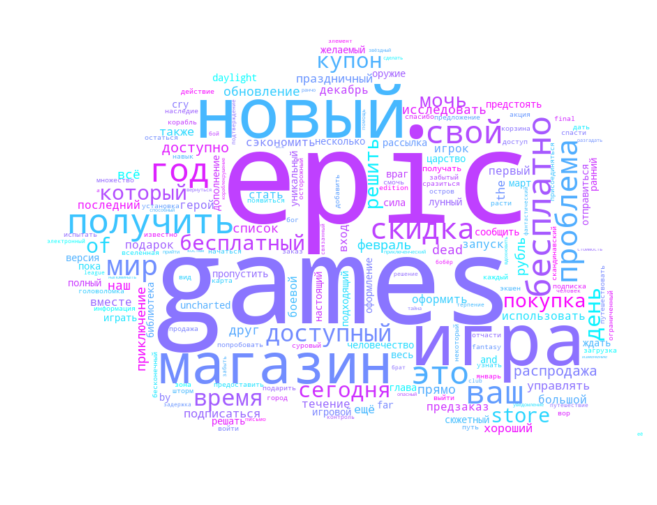

In [ ]:
url = 'https://www.pinclipart.com/picdir/middle/519-5194083_cloud-clipart.png'
# https://psv4.userapi.com/c237331/u31556697/docs/d19/0c645e0a7cb7/IMG_2187.png?extra=Z2RFG27eRO8O_577oxCW2LxfL1tVVdp7B9aoCD388Z3ansP5jFNs2eE8UGEDh9gcYgw0rY_Cy2xzsxHVoUA3-LlTFH3js7T6ycch8PIq0kGofN02NiLRPPd6TM3jm_ZJgsjJYDCJN4m_xKD8R7RAh_Q
response = requests.get(url)
game_mask = np.array(Image.open(BytesIO(response.content)))

wc = WordCloud(background_color="white", max_words=200, mask=game_mask, colormap='cool')
wc.generate_from_frequencies(counted_words)

plt.figure(figsize=(11, 11))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

–¢–∞–∫ –∫–∞–∫ –º—ã –ø–∞—Ä—Å–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –ø–æ —Ç–µ–º–µ –∏–≥—Ä —Å –≥—Ä—É–ø–ø—ã –í–ö, —Å–æ–∑–¥–∞–Ω–Ω–æ–π –∫–æ–º–ø–∞–Ω–∏–µ–π Epic Games Store, –æ—á–µ–≤–∏–¥–Ω—ã–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –æ–∫–∞–∑–∞–ª–æ—Å—å, —á—Ç–æ —Å—Ä–µ–¥–∏ —Å–∞–º—ã—Ö —á–∞—Å—Ç–æ–∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö —Å–ª–æ–≤ –Ω–∞–∑–≤–∞–Ω–∏–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –æ–Ω–ª–∞–π–Ω-–¥–∏—Å—Ç—Ä–∏–±—å—é—Ü–∏–∏

## –ß–∞—Å—Ç–æ—Ç–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —É–Ω–∏–≥—Ä–∞–º–º

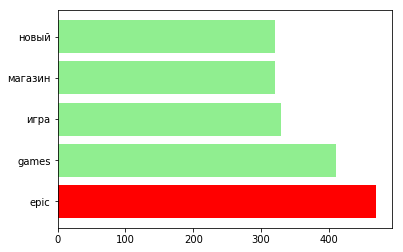

In [ ]:
res = pd.DataFrame(all_words, columns={'word'})
res['number'] = 1
res = res.groupby("word", as_index=False)['number'].count()
vis = res.nlargest(5, columns={'number'})

colors =["red"] + ["lightgreen" for _ in range(4)]
plt.barh(y=vis.word, width=vis.number, color=colors)
plt.show()

–ë–æ–ª–µ–µ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ –≤–∏–¥–Ω—ã —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞. –ù–∏—á–µ–≥–æ –Ω–æ–≤–æ–≥–æ –æ–∂–∏–¥–∞—Ç—å –∏ –Ω–µ —Å—Ç–æ–∏–ª–æ

## –ê–Ω–∞–ª–∏–∑ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏

In [ ]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [ ]:
itog = pd.DataFrame(set(all_words), columns={'word'})

results = model.predict(all_words, k=1)
sent = []

for message, sentiment in zip(counted_words, results):
    sent.append(list(sentiment.keys())[0])

itog["sentiment"] = sent

In [ ]:
itog['number'] = 1
itog = itog.groupby('sentiment', as_index=False)['number'].count()
itog = itog.sort_values('number', ascending=False)

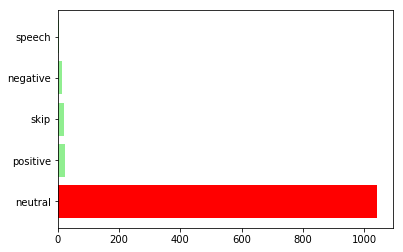

In [ ]:
colors = ["red"] + ["lightgreen" for _ in range(4)]
plt.barh(y=itog.sentiment, width=itog.number, color=colors)
plt.show()

–ö–∞–∫ –ø–æ–∫–∞–∑–∞–Ω–æ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ - –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–π —Ç–∏–ø —Ä–µ—á–∏

## –ß–∞—Å—Ç–æ—Ç–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –±–∏–≥—Ä–∞–º–º

In [ ]:
def find_bigram(message):
  message = message.lower()
  message = clear_links(message)
  message = clear_message(message)
  message = remove_emoji(message)
  message = spell(message)
  message = token_by_words(message)
  return list(nltk.bigrams(message))

In [ ]:
df['bigrams'] = ""
for i in range(0, len(df)):
  df.bigrams.iloc[i] = find_bigram(df.text.iloc[i])

In [ ]:
all_bigrams = []
for i in range(0, len(df)):
    all_bigrams.extend(df.bigrams.iloc[i])

In [ ]:
all_bigrams

In [ ]:
all_bigrams_listed = list()

for i in range(0, len(all_bigrams)):
  temp = all_bigrams[i][0] + " "
  temp += all_bigrams[i][1]
  all_bigrams_listed.append(temp)

all_bigrams_listed

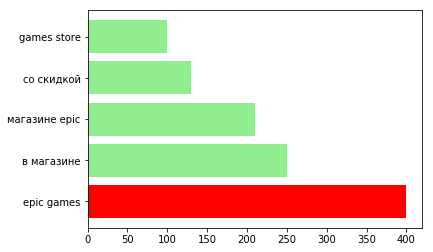

In [ ]:
result = pd.DataFrame(all_bigrams_listed, columns={'bigram'})
result['number'] = 1
result = result.groupby('bigram', as_index=False)['number'].count()
visual = result.nlargest(5, columns={'number'})

colors = ["red"] + ["lightgreen" for _ in range(4)]
plt.barh(y=visual.bigram, width=visual.number, color=colors)
plt.show()

–í–∏–¥–Ω–æ, —á—Ç–æ —Å –±–æ–ª—å—à–∏–º –æ—Ç—Ä—ã–≤–æ–º –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç –±–∏–≥—Ä–∞–º–º–∞ "epic games". –†–µ–∑—É–ª—å—Ç–∞—Ç —Ç–∞–∫–∂–µ –∫–∞–∂–µ—Ç—Å—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º—ã–º

## –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑

In [ ]:
id2word = corpora.Dictionary(df.pre.tolist())
texts = df.pre.tolist()
corpus = [id2word.doc2bow(text) for text in texts]

warnings.filterwarnings("ignore")

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
	

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=20, step=1)

In [ ]:
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º")
plt.ylabel("–°–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å")
plt.legend(("coherence_values"), loc='best')
plt.grid()
plt.show()

In [ ]:
n_topics = 8
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=n_topics)

In [ ]:
lda_model.print_topics()

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.088325  0.105731       1        1  32.611096
1      0.035093 -0.031663       2        1  20.866090
2     -0.147466  0.105282       3        1  16.938459
3     -0.077510 -0.142474       4        1  14.841539
4      0.101559 -0.036876       5        1  14.742815, topic_info=           Term        Freq       Total Category  logprob  loglift
60    –±–µ—Å–ø–ª–∞—Ç–Ω–æ  206.000000  206.000000  Default  30.0000  30.0000
3      –ø—Ä–æ–±–ª–µ–º–∞  152.000000  152.000000  Default  29.0000  29.0000
78          –≤–∞—à  179.000000  179.000000  Default  28.0000  28.0000
219       –ø—Ä—è–º–æ   70.000000   70.000000  Default  27.0000  27.0000
123       –∫—É–ø–æ–Ω  116.000000  116.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
370        –¥–µ–Ω—å   18.934438  125.173068   Topic5  -5.1227   0.0257
109       –≤—Ä–µ–º—è   18.855446  133.469405   Topic5  -5.1269  -0.0427
178  —Ä–∞—Å–ø—Ä–æ–¥–∞–∂–∞   17.191212   86.569693   Topic5  -5.2193   0.2979
13          —ç—Ç–æ   17.204645  179.389756   Topic5  -5.2185  -0.4300
33         –∏–≥—Ä–∞   17.065318  303.689253   Topic5  -5.2267  -0.9645

[377 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1017      3  0.975748    architect
913       1  0.049078  battlefield
913       3  0.932489  battlefield
439       1  0.259046           by
439       2  0.051809           by
...     ...       ...          ...
831       5  0.849750      ü§©—á–µ—Ç—ã—Ä—å
832       2  0.094347       ü¶ï–Ω–æ–≤—ã–π
832       5  0.849122       ü¶ï–Ω–æ–≤—ã–π
833       2  0.094128   ü¶ñ—Ä–∞—Å—à–∏—Ä–∏—Ç—å
833       5  0.847150   ü¶ñ—Ä–∞—Å—à–∏—Ä–∏—Ç—å

[646 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=5)
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.145368  0.105312       1        1  22.411664
2     -0.036881 -0.121203       2        1  20.197618
3     -0.158092  0.119149       3        1  19.746042
1      0.062186 -0.029983       4        1  19.202249
0     -0.012582 -0.073274       5        1  18.442427, topic_info=            Term        Freq       Total Category  logprob  loglift
3       –ø—Ä–æ–±–ª–µ–º–∞  160.000000  160.000000  Default  30.0000  30.0000
141         –¥—Ä—É–≥   68.000000   68.000000  Default  29.0000  29.0000
83      —Å–æ–æ–±—â–∏—Ç—å   41.000000   41.000000  Default  28.0000  28.0000
79          –≤—Ö–æ–¥   50.000000   50.000000  Default  27.0000  27.0000
23         –Ω–æ–≤—ã–π  297.000000  297.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
424          –≤—Å—ë   18.041463   66.529432   Topic5  -5.3949   0.3855
539          and   16.421531   38.574494   Topic5  -5.4890   0.8365
179      —Å–µ–≥–æ–¥–Ω—è   17.836380  113.586125   Topic5  -5.4064  -0.1608
71   –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏–µ   16.954264   77.650888   Topic5  -5.4571   0.1688
35       –∫–æ—Ç–æ—Ä—ã–π   16.897947  105.361102   Topic5  -5.4604  -0.1397

[376 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
539       1  0.285163        and
539       3  0.103695        and
539       4  0.181467        and
539       5  0.414782        and
1017      1  0.772997  architect
...     ...       ...        ...
13        2  0.225620        —ç—Ç–æ
13        3  0.146653        —ç—Ç–æ
13        4  0.298947        —ç—Ç–æ
13        5  0.236902        —ç—Ç–æ
818       2  0.928188         üßõ‚Äç

[695 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 1])

–ú–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å —Å–ª–µ–¥—É—é—É—â–∏–µ —Ç–µ–º—ã:
  - –û–ø–æ–≤–µ—â–µ–Ω–∏–µ –æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø—Ä–æ–±–ª–µ–º–∞—Ö, –±–∞–≥–∞—Ö
  - –°–∞–º –º–∞–≥–∞–∑–∏–Ω Epic Games
  - –û–ø–æ–≤–µ—â–µ–Ω–∏–µ –æ —Ä–∞–∑–¥–∞—á–∞—Ö, —Å–∫–∏–¥–∫–∞—Ö –∏ —Ç–ø.
  - –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–æ—Å—Ç—É–ø–µ –Ω–æ–≤–æ–π –∏–≥—Ä—ã
  - –û —à—É—Ç–µ—Ä-–ø—Ä–∏–∫–ª—é—á–µ–Ω–∏–∏

## –ì—Ä–∞—Ñ—ã

In [ ]:
pairs = []
for doc in df.pre.tolist():
  if doc:
    b = list((nltk.bigrams(doc)))
    if b:
      pairs.extend(b)
len(pairs)

20560

In [ ]:
pairs = [tuple(sorted(pair)) for pair in pairs]

In [ ]:
word_pairs = dict(Counter(pairs))
print(len(word_pairs))

1787


In [ ]:
word_pairs = [(pair[0], pair[1], val) for pair, val in word_pairs.items() if val > 10]
print(len(word_pairs))
word_pairs[:10]

124


[('–ø—Ä–æ–±–ª–µ–º–∞', '—Ä–µ—à–∏—Ç—å', 50),
 ('–ø—Ä–æ–±–ª–µ–º–∞', '—Å–≤—è–∑–∞–Ω–Ω—ã–π', 20),
 ('–ø–∏—Å—å–º–æ', '—ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω—ã–π', 20),
 ('–ø–∏—Å—å–º–æ', '–ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–µ', 20),
 ('–ø—Ä–æ–±–ª–µ–º–∞', '—Ä–µ—à–µ–Ω–∏–µ', 20),
 ('–æ—Ç–ø—Ä–∞–≤–∏—Ç—å—Å—è', '–ø—Ä–µ–¥—Å—Ç–æ—è—Ç—å', 20),
 ('–≥–æ–ª–æ–≤–æ–ª–æ–º–∫–∞', '—Ä–µ—à–∞—Ç—å', 30),
 ('epic', 'games', 400),
 ('games', 'store', 100),
 ('–≤—Ö–æ–¥', '–ø—Ä–æ–±–ª–µ–º–∞', 40)]

In [ ]:
G = nx.Graph()
edges = word_pairs
edges[:10], len(edges)

([('–ø—Ä–æ–±–ª–µ–º–∞', '—Ä–µ—à–∏—Ç—å', 50),
  ('–ø—Ä–æ–±–ª–µ–º–∞', '—Å–≤—è–∑–∞–Ω–Ω—ã–π', 20),
  ('–ø–∏—Å—å–º–æ', '—ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω—ã–π', 20),
  ('–ø–∏—Å—å–º–æ', '–ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–µ', 20),
  ('–ø—Ä–æ–±–ª–µ–º–∞', '—Ä–µ—à–µ–Ω–∏–µ', 20),
  ('–æ—Ç–ø—Ä–∞–≤–∏—Ç—å—Å—è', '–ø—Ä–µ–¥—Å—Ç–æ—è—Ç—å', 20),
  ('–≥–æ–ª–æ–≤–æ–ª–æ–º–∫–∞', '—Ä–µ—à–∞—Ç—å', 30),
  ('epic', 'games', 400),
  ('games', 'store', 100),
  ('–≤—Ö–æ–¥', '–ø—Ä–æ–±–ª–µ–º–∞', 40)],
 124)

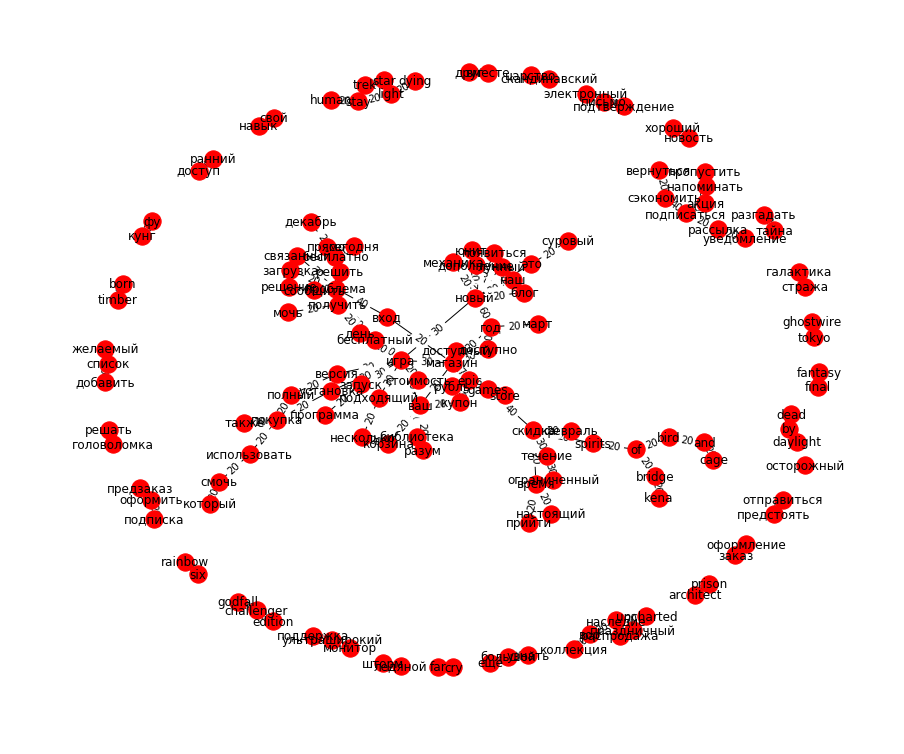

In [ ]:
plt.figure(figsize=(12,10))
G.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [ ]:
remove = [node for node, degree in dict(G.degree()).items() if degree < 2]
G.remove_nodes_from(remove)

In [ ]:
remove_edge = [pair for pair in G.edges() if pair[0] in remove and pair[1] in remove]
G.remove_edges_from(remove_edge)

In [ ]:
remove = [node for node, degree in dict(G.degree()).items() if degree < 1]
G.remove_nodes_from(remove)

In [ ]:
node_sizes = [deg*50 for node, deg in G.degree().items()]

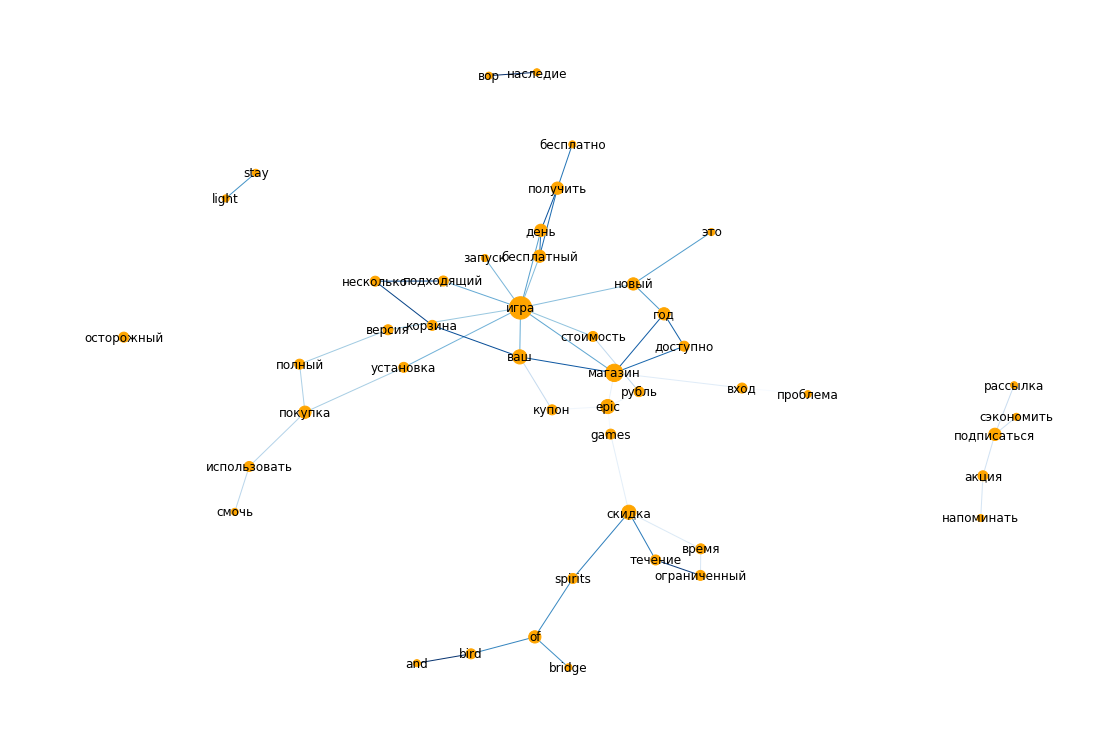

In [ ]:
plt.figure(figsize=(15,10))
pos = nx.layout.spring_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, node_color='orange', node_size=node_sizes, edgelist=G.edges(), edge_color=range(len(G.edges())), width=1.0, with_labels=True, edge_cmap=plt.cm.Blues)
plt.show()

–ì–ª–∞–≤–Ω–∞—è –≤–µ—Ç–∫–∞ —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ —Ç–µ—Å–Ω–æ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ –∏–≥—Ä–µ, –∫–∞–∫ –∫ —Ç–æ–≤–∞—Ä—É –∏ –ø—Ä–µ–¥–º–µ—Ç—É –ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è: –∏–≥—Ä–∞ -> (—Å—Ç–æ–∏–º–æ—Å—Ç—å, –∫–æ—Ä–∑–∏–Ω–∞, –∑–∞–ø—É—Å–∫, —É—Å—Ç–∞–Ω–æ–≤–∫–∞, –≤–µ—Ä—Å–∏—è –∏ —Ç–ø.)

–û–¥–Ω–∞–∫–æ –∑–¥–µ—Å—å –µ—â–µ —è–≤–Ω–æ –≤—ã–¥–µ–ª—è—é—Ç—Å—è –¥–≤–µ —Ç–µ–º—ã:
  - –ù–∞–ø–æ–º–∏–Ω–∞–Ω–∏—è –æ–± –∞–∫—Ü–∏—è—Ö
  - –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ–± –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–∏ –¥–µ–π—Å—Ç–≤–∏—è —Å–∫–∏–¥–∫–∏